# Econometria
---

## Dataset

In [113]:
library(dplyr)
library(ggplot2)
library(gplots)
library(cowplot)
library(graphics)

In [5]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


## Quantidade de linhas e colunas e tipo das variáveis

In [6]:
dim(data)
str(data)

[1] 548127    137

'data.frame':	548127 obs. of  137 variables:
 $ NU_ANO            : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ CO_IES            : int  1356 1356 1356 1356 1356 1356 1356 1356 1356 1356 ...
 $ CO_CATEGAD        : int  10003 10003 10003 10003 10003 10003 10003 10003 10003 10003 ...
 $ CO_ORGACAD        : int  10020 10020 10020 10020 10020 10020 10020 10020 10020 10020 ...
 $ CO_GRUPO          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_CURSO          : int  47116 47116 47116 47116 47116 47116 47116 47116 47116 47116 ...
 $ CO_MODALIDADE     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ CO_MUNIC_CURSO    : int  3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 3546603 ...
 $ CO_UF_CURSO       : int  35 35 35 35 35 35 35 35 35 35 ...
 $ CO_REGIAO_CURSO   : int  3 3 3 3 3 3 3 3 3 3 ...
 $ NU_IDADE          : int  22 49 23 25 22 22 22 22 25 21 ...
 $ TP_SEXO           : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 2 1 2 1 ...
 $ ANO_FIM_EM        : int  2013 1988 2013 2011 

## Isolando de Ciências Econômicas e presença no Enade
### Caminho:
> Ciências Econômicas(cód.:13); TP_PRES (cód:555). 

In [7]:
df = data[data$CO_GRUPO == 13 & data$TP_PRES == 555,]
head(df)
dim(df)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
161,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
162,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
163,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
164,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
165,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
166,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6


[1] 8075  137

In [8]:
# transformando o turno em fator
df$CO_TURNO_GRADUACAO = as.factor(df$CO_TURNO_GRADUACAO)

In [9]:
colnames(df)[15] = 'turno'
colnames(df)[45] = 'nota_geral'
summary(df$turno)
summary(df$nota_geral)

1    2    3    4 
1179  133 1956 4807

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   28.90   37.20   38.41   47.00   90.20       4 

In [10]:
df = subset(df, turno == 1 | turno == 4, select = c("turno", "nota_geral"))

In [11]:
dim(df)

[1] 5986    2

# Valores missing

In [12]:
sapply(df, function(x) sum(is.na(x)))


turno nota_geral 
         0          3

# Excluindo valores missing

In [13]:
df = na.omit(df)

In [14]:
sapply(df, function(x) sum(is.na(x)))
dim(df)

turno nota_geral 
         0          0

[1] 5983    2

In [15]:
head(df)
summary(df)

,turno,nota_geral
161,4,24.9
162,4,25.6
163,4,48.7
164,4,35.7
165,4,33.9
166,4,23.5


 turno      nota_geral   
 1:1179   Min.   : 0.00  
 2:   0   1st Qu.:28.00  
 3:   0   Median :35.80  
 4:4804   Mean   :37.05  
          3rd Qu.:45.20  
          Max.   :90.20  

In [16]:
df$turno = factor(df$turno)

In [17]:
summary(df)

 turno      nota_geral   
 1:1179   Min.   : 0.00  
 4:4804   1st Qu.:28.00  
          Median :35.80  
          Mean   :37.05  
          3rd Qu.:45.20  
          Max.   :90.20  

In [18]:
levels(df$turno) = c('matutino', 'noturno')

In [19]:
summary(df)

      turno        nota_geral   
 matutino:1179   Min.   : 0.00  
 noturno :4804   1st Qu.:28.00  
                 Median :35.80  
                 Mean   :37.05  
                 3rd Qu.:45.20  
                 Max.   :90.20  

In [20]:
df <- df %>% mutate(id = row_number())

In [21]:
df <- df[c("id", "turno", "nota_geral")]

In [22]:
head(df)

,id,turno,nota_geral
161,1,noturno,24.9
162,2,noturno,25.6
163,3,noturno,48.7
164,4,noturno,35.7
165,5,noturno,33.9
166,6,noturno,23.5


# Métricas das variáveis

In [23]:
print('=========== Quartis + Mediana + Média + Máxim/Mínimo ============')
print('Métricas das notas do turno noturno:')
summary(df[df$turno=='noturno',3])
print(('Métricas das notas do turno matutino:'))
summary(df[df$turno=='matutino',3])
print('=========== Variância ===============')
print(paste0('Variância das notas do turno noturno: ', round(var(df[df$turno=='noturno',3]),2)))
print(paste0('Variância das notas do turno matutino: ',round (var(df[df$turno=='matutino',3]),2)))
print('=========== Desvio Padrão ============')
print(paste0('Desvio Padrão das notas do turno noturno: ', round(sd(df[df$turno=='noturno',3]),2)))
print(paste0('Desvio Padrão notas do turno matutino: ',round (sd(df[df$turno=='matutino',3]),2)))

[1] "=========== Quartis + Mediana + Média + Máxim/Mínimo ============"
[1] "Métricas das notas do turno noturno:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   27.40   34.85   36.10   43.90   81.50 

[1] "Métricas das notas do turno matutino:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.90   30.45   40.40   40.89   49.95   90.20 

[1] "=========== Variância ==============="
[1] "Variância das notas do turno noturno: 151.57"
[1] "Variância das notas do turno matutino: 180.05"
[1] "=========== Desvio Padrão ============"
[1] "Desvio Padrão das notas do turno noturno: 12.31"
[1] "Desvio Padrão notas do turno matutino: 13.42"


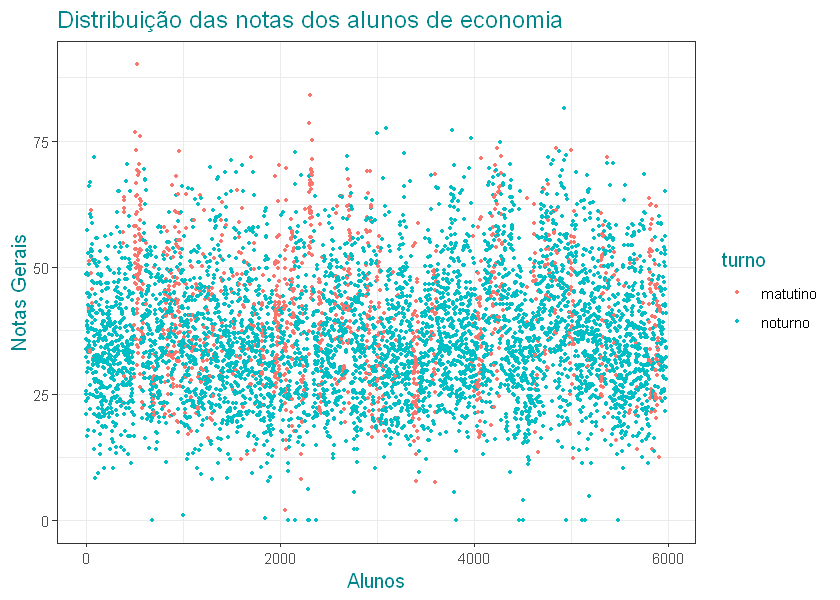

In [49]:
### 2. Gráfico
ggplot(data=df, aes(x=id, y=nota_geral))+
    geom_point(aes(color=turno), size=0.8)+
    ggtitle("Distribuição das notas dos alunos de economia")+
    labs(x="Alunos", y="Notas Gerais")+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))


In [26]:
noturno = df[df$turno=='noturno',]
matutino = df[df$turno=='matutino',]

[1] "Desvio Padrão notas do turno matutino: 13.42"
[1] "Desvio Padrão das notas do turno noturno: 12.31"


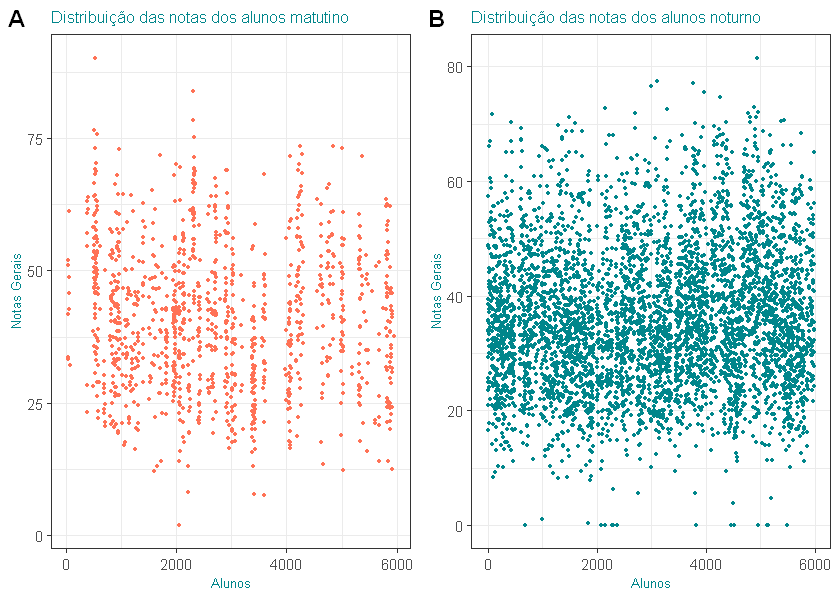

In [69]:
plot2 = ggplot(data=noturno, aes(x=id, y=nota_geral))+
            geom_point(color="turquoise4", size=0.8)+
            ggtitle("Distribuição das notas dos alunos noturno")+
            labs(x="Alunos", y="Notas Gerais")+
            theme_bw()+
            theme(title=element_text(size=8,color="turquoise4"))
plot1 = ggplot(data=matutino, aes(x=id, y=nota_geral))+
            geom_point(color="coral1",size=0.8)+
            ggtitle("Distribuição das notas dos alunos matutino")+
            labs(x="Alunos", y="Notas Gerais")+
            theme_bw()+
            theme(title=element_text(size=8,color="turquoise4"))
plot_grid(plot1, plot2, labels = "AUTO")
print(paste0('Desvio Padrão notas do turno matutino: ',round (sd(df[df$turno=='matutino',3]),2)))
print(paste0('Desvio Padrão das notas do turno noturno: ', round(sd(df[df$turno=='noturno',3]),2)))

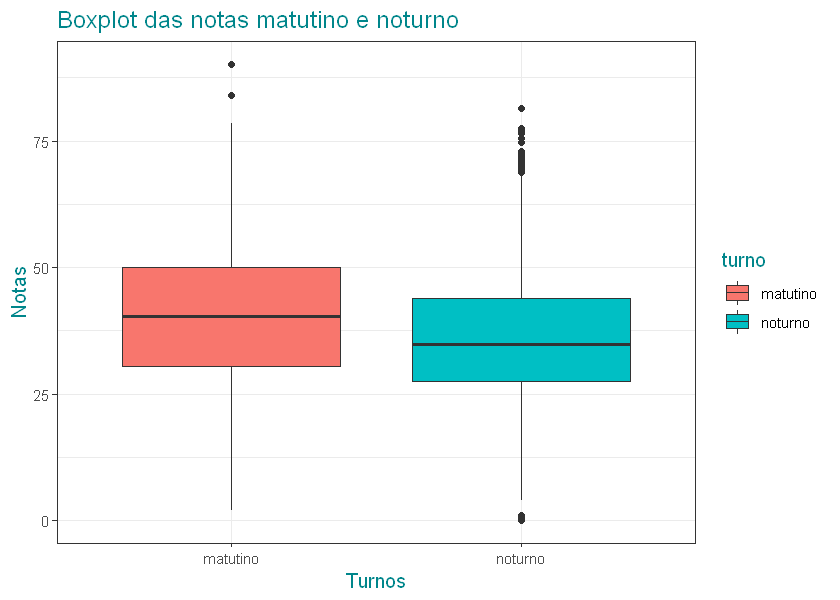

In [66]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df, aes(x=turno, y=nota_geral, fill=turno)) +
    geom_boxplot() +
    ggtitle("Boxplot das notas matutino e noturno") +
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))+
    xlab("Turnos")+
    ylab("Notas")

[1] "Métricas das notas do turno noturno:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   27.40   34.85   36.10   43.90   81.50 

[1] "Métricas das notas do turno matutino:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.90   30.45   40.40   40.89   49.95   90.20 

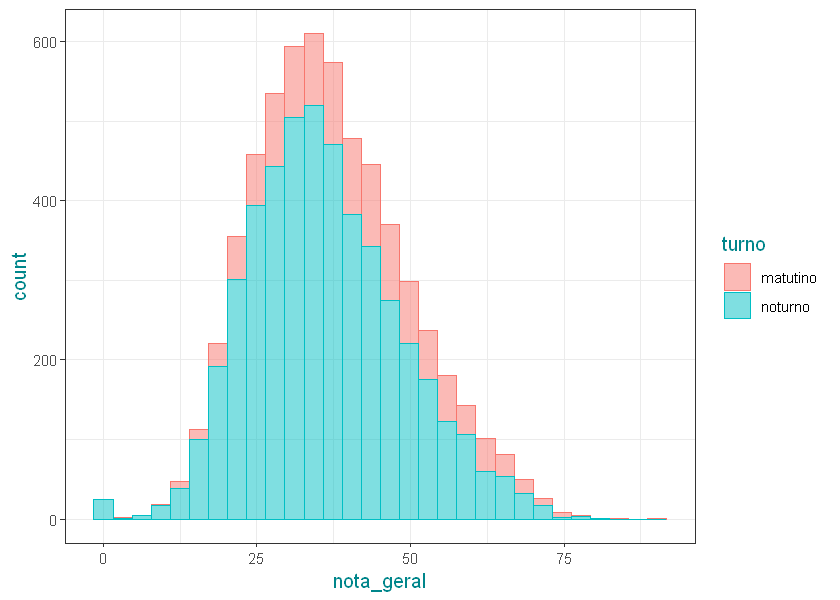

In [70]:
ggplot(df, aes(x=nota_geral, color=turno, fill=turno)) +
    geom_histogram(alpha=0.5, bins = 30)+
    theme_bw()+
    theme(title=element_text(size=12,color="turquoise4"))
print('Métricas das notas do turno noturno:')
summary(df[df$turno=='noturno',3])
print(('Métricas das notas do turno matutino:'))
summary(df[df$turno=='matutino',3])

# Incluindo uma coluna com 0 e 1, sendo matutino 0 e noturno 1

In [110]:
df = mutate(df, turno_bi = ifelse(turno=="noturno",1,0))

In [111]:
head(df)

,id,turno,nota_geral,turno_bi
161,1,noturno,24.9,1
162,2,noturno,25.6,1
163,3,noturno,48.7,1
164,4,noturno,35.7,1
165,5,noturno,33.9,1
166,6,noturno,23.5,1


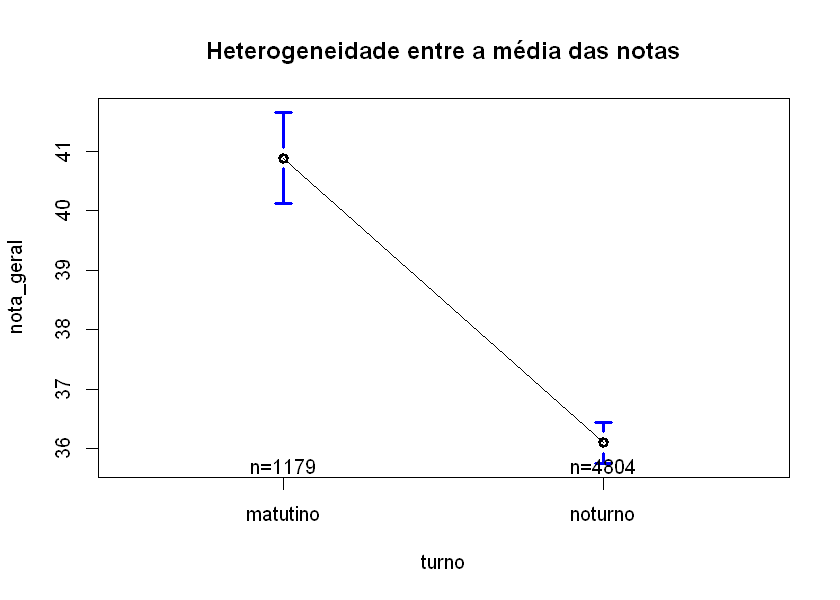

In [144]:
plotmeans(nota_geral~turno, data=df, barwidth=3,main="Heterogeneidade entre a média das notas")


In [146]:
Y = df[,3]

In [150]:
db = df[,4]

In [153]:
# Constante
X = df[,1]

In [154]:
x_d = X*db

In [173]:
mod = lm(Y~db+X+x_d)

In [174]:
mod


Call:
lm(formula = Y ~ db + X + x_d)

Coefficients:
(Intercept)           db            X          x_d  
 42.6745692   -8.2214938   -0.0006395    0.0011816  


In [175]:
summary(mod)


Call:
lm(formula = Y ~ db + X + x_d)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.460  -9.067  -1.085   8.062  47.865 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.6745692  0.7304099  58.426  < 2e-16 ***
db          -8.2214938  0.8148884 -10.089  < 2e-16 ***
X           -0.0006395  0.0002269  -2.818  0.00485 ** 
x_d          0.0011816  0.0002492   4.741 2.17e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.5 on 5979 degrees of freedom
Multiple R-squared:  0.02837,	Adjusted R-squared:  0.02788 
F-statistic: 58.19 on 3 and 5979 DF,  p-value: < 2.2e-16


In [176]:
predict(x=)

1        2        3        4        5        6        7        8 
34.45362 34.45416 34.45470 34.45524 34.45579 34.45633 34.45687 34.45741 
       9       10       11       12       13       14       15       16 
34.45795 34.45850 34.45904 34.45958 34.46012 34.46066 34.46121 34.46175 
      17       18       19       20       21       22       23       24 
34.46229 34.46283 34.46337 34.46392 34.46446 34.46500 34.46554 34.46608 
      25       26       27       28       29       30       31       32 
34.46663 34.46717 34.46771 34.46825 34.46879 34.46934 34.46988 34.47042 
      33       34       35       36       37       38       39       40 
34.47096 34.47150 34.47205 42.65155 34.47313 34.47367 42.64963 34.47476 
      41       42       43       44       45       46       47       48 
34.47530 34.47584 34.47638 34.47692 42.64579 34.47801 34.47855 42.64387 
      49       50       51       52       53       54       55       56 
34.47963 42.64259 34.48072 34.48126 34.48180 34.48234 34.48289 42.63876 
      57       58       59       60       61       62       63       64 
34.48397 34.48451 34.48506 42.63620 34.48614 34.48668 34.48722 34.48777 
      65       66       67       68       69       70       71       72 
34.48831 42.63236 34.48939 34.48993 42.63044 34.49102 42.62916 34.49210 
      73       74       75       76       77       78       79       80 
34.49264 34.49319 34.49373 34.49427 34.49481 34.49535 34.49590 34.49644 
      81       82       83       84       85       86       87       88 
34.49698 34.49752 34.49806 34.49861 34.49915 34.49969 34.50023 34.50077 
      89       90       91       92       93       94       95       96 
34.50132 34.50186 34.50240 34.50294 34.50348 34.50403 34.50457 34.50511 
      97       98       99      100      101      102      103      104 
34.50565 34.50619 34.50674 34.50728 34.50782 34.50836 34.50890 34.50945 
     105      106      107      108      109      110      111      112 
34.50999 34.51053 34.51107 34.51161 34.51216 34.51270 34.51324 34.51378 
     113      114      115      116      117      118      119      120 
34.51432 34.51487 34.51541 34.51595 34.51649 34.51703 34.51758 34.51812 
     121      122      123      124      125      126      127      128 
34.51866 34.51920 34.51974 34.52029 34.52083 34.52137 34.52191 34.52245 
     129      130      131      132      133      134      135      136 
34.52300 34.52354 34.52408 34.52462 34.52517 34.52571 34.52625 34.52679 
     137      138      139      140      141      142      143      144 
34.52733 34.52788 34.52842 34.52896 34.52950 34.53004 34.53059 34.53113 
     145      146      147      148      149      150      151      152 
34.53167 34.53221 34.53275 34.53330 34.53384 34.53438 34.53492 34.53546 
     153      154      155      156      157      158      159      160 
34.53601 34.53655 34.53709 34.53763 34.53817 34.53872 34.53926 34.53980 
     161      162      163      164      165      166      167      168 
34.54034 34.54088 34.54143 34.54197 34.54251 34.54305 34.54359 34.54414 
     169      170      171      172      173      174      175      176 
34.54468 34.54522 34.54576 34.54630 34.54685 34.54739 34.54793 34.54847 
     177      178      179      180      181      182      183      184 
34.54901 34.54956 34.55010 34.55064 34.55118 34.55172 34.55227 34.55281 
     185      186      187      188      189      190      191      192 
34.55335 34.55389 34.55443 34.55498 34.55552 34.55606 34.55660 34.55714 
     193      194      195      196      197      198      199      200 
34.55769 34.55823 34.55877 34.55931 34.55985 34.56040 34.56094 34.56148 
     201      202      203      204      205      206      207      208 
34.56202 34.56257 34.56311 34.56365 34.56419 34.56473 34.56528 34.56582 
     209      210      211      212      213      214      215      216 
34.56636 34.56690 34.56744 34.56799 34.56853 34.56907 34.56961 34.57015 
     217      218      219      220      221      222      223   

In [171]:
mod2 = lm(Y~db)

In [172]:
summary(mod2)


Call:
lm(formula = Y ~ db)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.990  -9.002  -1.102   8.098  49.310 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.8902     0.3651  111.99   <2e-16 ***
db           -4.7886     0.4075  -11.75   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.54 on 5981 degrees of freedom
Multiple R-squared:  0.02257,	Adjusted R-squared:  0.02241 
F-statistic: 138.1 on 1 and 5981 DF,  p-value: < 2.2e-16
